In [43]:
#import libraries
%matplotlib inline
import os
import seaborn, sklearn
import matplotlib.pyplot as plt, numpy as np, pandas as pd
import librosa, librosa.display
import IPython.display as ipd
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, classification_report, silhouette_score

# Means data

In [44]:
meansdf = pd.read_csv("df_mfcc_mean.csv")
meansdf = meansdf.drop(columns = ['Unnamed: 0','gender','intensity'])

In [45]:
#test train
#set data as X, labels as y
X = np.array(meansdf.drop(columns='emotion',axis=1))
y = np.array(meansdf['emotion'])

#divide into test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [46]:
#grid search to tune parameters
from sklearn.model_selection import GridSearchCV
#set hyperparameters as dictionary

param_grid = {'n_components': [3], 
              'covariance_type': ['full', 'tied', 'diag', 'spherical'],
              'init_params': ['kmeans', 'random']} 

grid = GridSearchCV(GaussianMixture(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
best_estimator = grid.best_estimator_
print(best_estimator)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END covariance_type=full, init_params=kmeans, n_components=3; total time=   0.0s
[CV] END covariance_type=full, init_params=kmeans, n_components=3; total time=   0.0s
[CV] END covariance_type=full, init_params=kmeans, n_components=3; total time=   0.0s
[CV] END covariance_type=full, init_params=kmeans, n_components=3; total time=   0.0s
[CV] END covariance_type=full, init_params=kmeans, n_components=3; total time=   0.0s
[CV] END covariance_type=full, init_params=random, n_components=3; total time=   0.0s
[CV] END covariance_type=full, init_params=random, n_components=3; total time=   0.0s
[CV] END covariance_type=full, init_params=random, n_components=3; total time=   0.0s
[CV] END covariance_type=full, init_params=random, n_components=3; total time=   0.0s
[CV] END covariance_type=full, init_params=random, n_components=3; total time=   0.0s
[CV] END covariance_type=tied, init_params=kmeans, n_components=3; total time=  

In [49]:
#create classifier
clf = GaussianMixture(n_components=3)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 0, 2], dtype=int64)

In [50]:
#re-label clusters to match data
y_pred = y_pred.tolist()
y_pred = [1 if x == 0 else 3 if x == 1 else 4 if x == 2 else x for x in y_pred]
y_pred=np.array(y_pred)

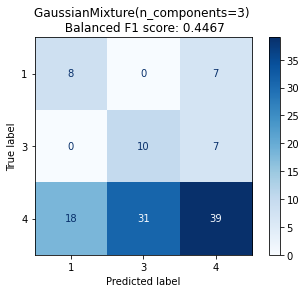

In [51]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, cmap=plt.cm.Blues)
f1 = round(f1_score(y_test,y_pred,average='weighted'),4)
plt.title(f'{best_estimator} \n Balanced F1 score: {f1}');

# Raw data

In [52]:
#import mfcc dataset
rawdf = pd.read_csv("mfcc_data.csv")

In [53]:
#test train
#set data as X, labels as y
X = np.array(rawdf.drop(columns='label',axis=1))
y = np.array(rawdf['label'])

#divide into test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [54]:
#grid search to tune parameters
from sklearn.model_selection import GridSearchCV
#set hyperparameters as dictionary

param_grid = {'n_components': [3], 
              'covariance_type': ['full', 'tied', 'diag', 'spherical'],
              'init_params': ['kmeans', 'random']} 

grid = GridSearchCV(GaussianMixture(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
best_estimator = grid.best_estimator_
print(best_estimator)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END covariance_type=full, init_params=kmeans, n_components=3; total time=   8.6s
[CV] END covariance_type=full, init_params=kmeans, n_components=3; total time=   8.6s
[CV] END covariance_type=full, init_params=kmeans, n_components=3; total time=   8.6s
[CV] END covariance_type=full, init_params=kmeans, n_components=3; total time=   8.7s
[CV] END covariance_type=full, init_params=kmeans, n_components=3; total time=   8.7s
[CV] END covariance_type=full, init_params=random, n_components=3; total time=  13.8s
[CV] END covariance_type=full, init_params=random, n_components=3; total time=  14.7s
[CV] END covariance_type=full, init_params=random, n_components=3; total time=  16.5s
[CV] END covariance_type=full, init_params=random, n_components=3; total time=  13.8s
[CV] END covariance_type=full, init_params=random, n_components=3; total time=  13.4s
[CV] END covariance_type=tied, init_params=kmeans, n_components=3; total time=  

In [58]:
#create classifier
clf = GaussianMixture(n_components=3,covariance_type='spherical')
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1,
       1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 0,
       0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0,
       2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [59]:
#re-label clusters to match data
y_pred = y_pred.tolist()
y_pred = [1 if x == 0 else 3 if x == 1 else 4 if x == 2 else x for x in y_pred]
y_pred=np.array(y_pred)

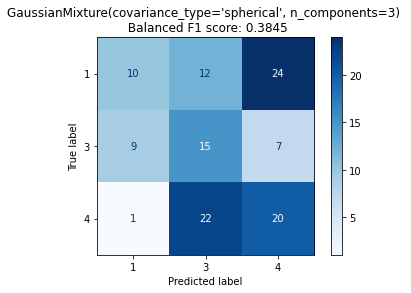

In [60]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, cmap=plt.cm.Blues)
f1 = round(f1_score(y_test,y_pred,average='weighted'),4)
plt.title(f'{best_estimator} \n Balanced F1 score: {f1}');

In [ ]:
print(f'rand score: {metrics.rand_score(y_test, y_pred)}')
print(f'homogeneity score: {metrics.homogeneity_score(y_test, y_pred)}')
print(f'completeneness score: {metrics.completeness_score(y_test,y_pred)}')
print(f'v-measure: {metrics.completeness_score(y_test,y_pred)}')
print(f'fawlkes_mallows score: {metrics.fowlkes_mallows_score(y_test,y_pred)}')
metrics.adjusted_mutual_info_score(y_test, y_pred)